In [1]:
import sys
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(kernel="linear")

features_train = [[0,0],[1,1]]
labels_train = [0,1]

features_test = features_train
labels_test = labels_train

#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data
clf.fit(features_train, labels_train)

#### store your predictions in a list named pred

pred = clf.predict(features_test)

# from sklearn.metrics import accuracy_score
# acc = accuracy_score(pred, labels_test)

# def submitAccuracy():
#     return acc

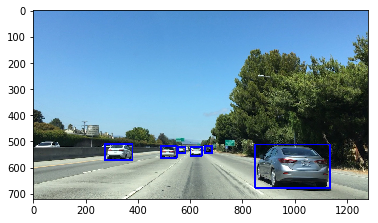

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    draw_img = np.copy(img)
    for lt, rb in bboxes:
        cv2.rectangle(draw_img, lt, rb, color, thick)
        
    return draw_img

# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]


result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

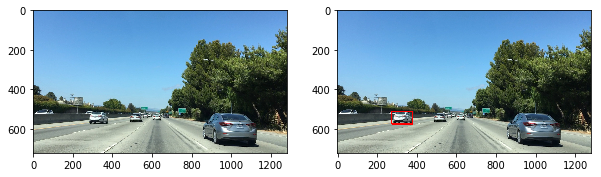

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('bbox-example-image.jpg')
template = mpimg.imread('cutout1.jpg')

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

lt = max_loc
rb = lt[0] + template.shape[1], lt[1] + template.shape[0]

img_box = np.copy(img)

cv2.rectangle(img_box, lt, rb, (255, 0, 0), 6)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(img)
ax2.imshow(img_box)
plt.show()


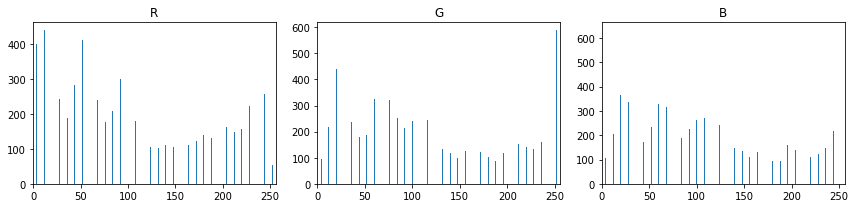

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=32, range=(0,256))
    ghist = np.histogram(img[:,:,1], bins=32, range=(0,256))
    bhist = np.histogram(img[:,:,2], bins=32, range=(0,256))
    # Generating bin centers
    edges = rhist[1]
    bin_centers = (edges[1:] + edges[0:len(edges)-1]) / 2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
def draw_hist(image, labels):    
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

    # Plot a figure with all three bar charts
    if rh is not None:
        fig = plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.bar(bincen, rh[0])
        plt.xlim(0, 256)
        plt.title(labels[0])
        plt.subplot(132)
        plt.bar(bincen, gh[0])
        plt.xlim(0, 256)
        plt.title(labels[1])
        plt.subplot(133)
        plt.bar(bincen, bh[0])
        plt.xlim(0, 256)
        plt.title(labels[2])
        fig.tight_layout()
    else:
        print('Your function is returning None for at least one variable...')

draw_hist(image, "RGB")
plt.show()

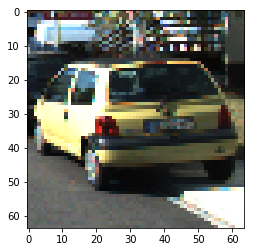

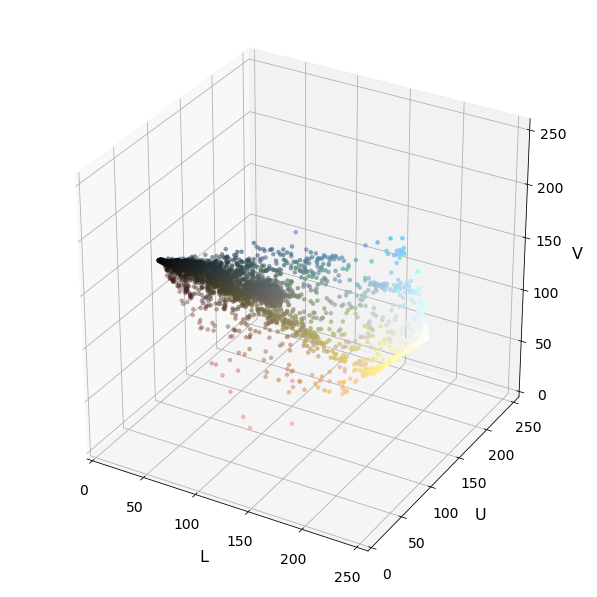

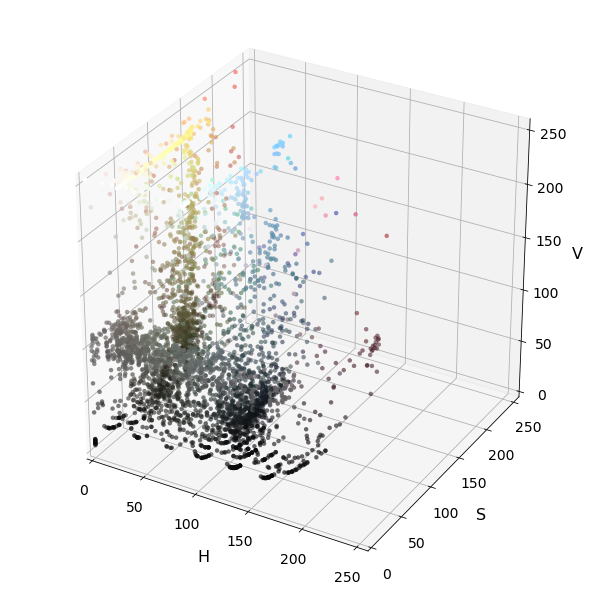

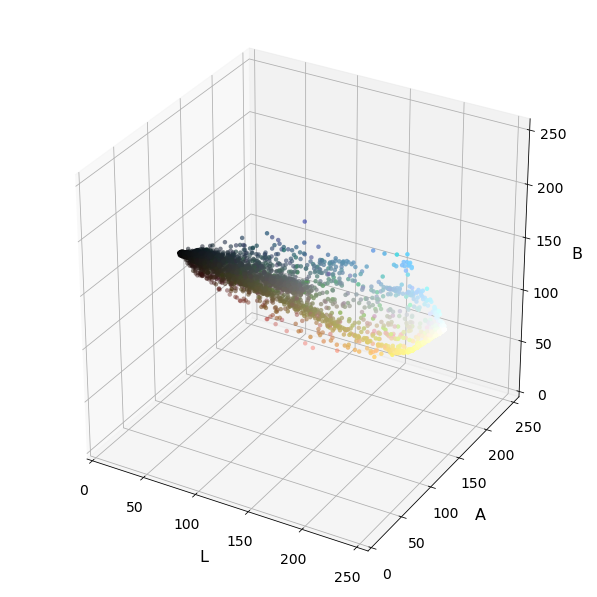

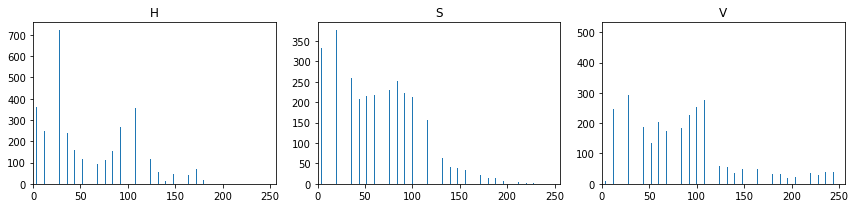

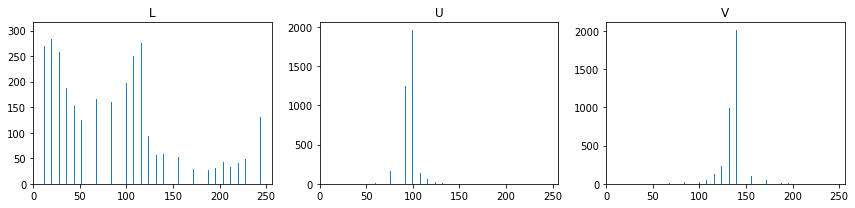

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
img = cv2.imread("25.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2LUV)
img_small_LAB = cv2.cvtColor(img_small, cv2.COLOR_RGB2LAB)
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

plt.imshow(img_small_RGB)
plt.show()

# Plot and show
plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LAB, img_small_rgb, axis_labels=list("LAB"))
plt.show()

draw_hist(img_small_HSV, "HSV")
draw_hist(img_small_LUV, "LUV")
plt.show()